## EX NO:

## DATE:

## <center>**Time Series analysis -2**</center>

## AIM:

To write a python code to build and evaluate ARIMA and SARIMA models using different parameters

## PROGRAM:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

### Load Dataset

In [ ]:
data = pd.read_csv('temperature.csv', parse_dates=['Date'], index_col='Date')
data

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


### Visualize data

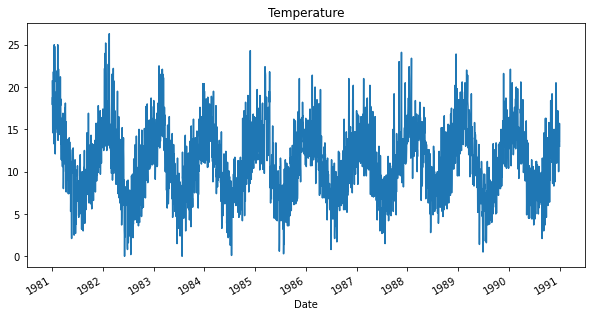

In [ ]:
data['Temp'].plot(title='Temperature', figsize=(10, 5))
plt.show()

### Decompose time series

In [ ]:
result = seasonal_decompose(data['Temp'], model='additive', period=30)

It works for additive but not multiplicative as temperature consist of negative and zero values

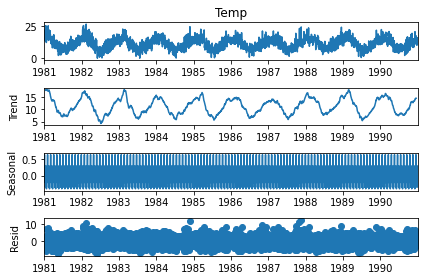

In [ ]:
result.plot()
plt.show()

In [ ]:
data

,Temp,MA_300,MA_1300,MA_3300,SES,DES,TES,Date,Regression_Pred
Date,,,,,,,,,
1981-01-01,20.7,NaN,NaN,NaN,20.700000,18.840918,18.689754,0,11.193304
1981-01-02,17.9,NaN,NaN,NaN,20.700000,19.655176,19.599762,1,11.193244
1981-01-03,18.8,NaN,NaN,NaN,19.300000,18.883766,19.023493,2,11.193184
1981-01-04,14.6,NaN,NaN,NaN,19.050000,18.845646,19.213295,3,11.193124
1981-01-05,15.8,NaN,NaN,NaN,16.825000,16.981602,16.900811,4,11.193064
...,...,...,...,...,...,...,...,...,...
1990-12-27,14.0,10.841333,11.333923,11.151636,13.498774,13.407483,13.774384,3645,10.974653
1990-12-28,13.6,10.823333,11.339308,11.152818,13.749387,13.666066,13.764559,3646,10.974593
1990-12-29,13.5,10.802333,11.345000,11.153242,13.674694,13.635712,13.916946,3647,10.974533


#### Autoregressive(AR) Model

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
# Fit AR model with lag=5
model_ar = AutoReg(data['Temp'], lags=5).fit()
data['AR_Pred'] = model_ar.predict(start=0, end=len(data)-1)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


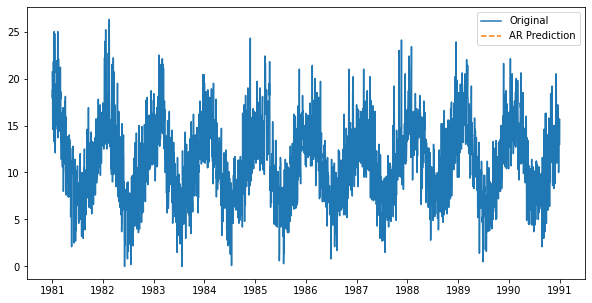

In [ ]:
# Plot
plt.figure(figsize=(10,5))
plt.plot(data['Temp'], label='Original')
plt.plot(data['AR_Pred'], label='AR Prediction', linestyle='dashed')
plt.legend()
plt.show()

#### Moving Average(MA) Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Fit MA model with q=2
model_ma = ARIMA(data['Temp'], order=(0, 0, 2)).fit()
data['MA_Pred'] = model_ma.fittedvalues

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


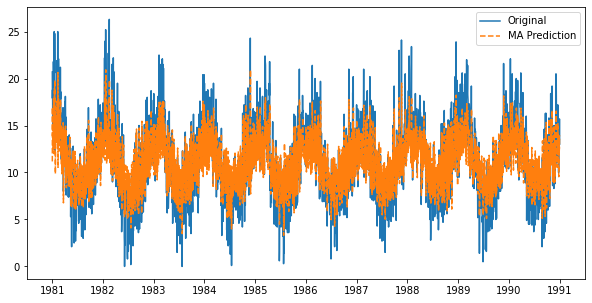

In [ ]:
# Plot
plt.figure(figsize=(10,5))
plt.plot(data['Temp'], label='Original')
plt.plot(data['MA_Pred'], label='MA Prediction', linestyle='dashed')
plt.legend()
plt.show()

## ARIMA MODEL

In [ ]:
# Fit ARIMA model with different parameters
model_arima_1 = ARIMA(data['Temp'], order=(1, 1, 1)).fit()
model_arima_2 = ARIMA(data['Temp'], order=(2, 1, 2)).fit()
model_arima_3 = ARIMA(data['Temp'], order=(3, 1, 3)).fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros a

In [ ]:
# Store predictions
data['ARIMA_1_Pred'] = model_arima_1.fittedvalues
data['ARIMA_2_Pred'] = model_arima_2.fittedvalues
data['ARIMA_3_Pred'] = model_arima_3.fittedvalues

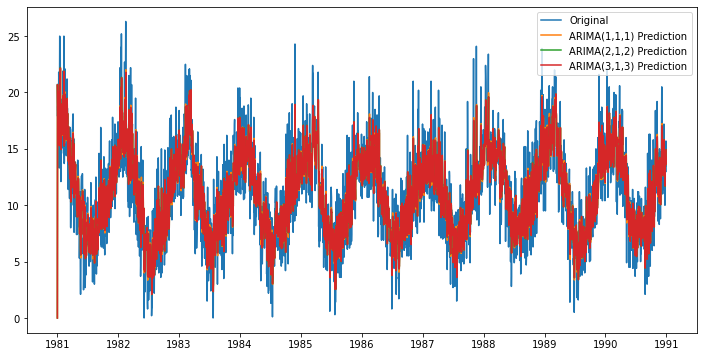

In [ ]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(data['Temp'], label='Original')
plt.plot(data['ARIMA_1_Pred'], label='ARIMA(1,1,1) Prediction')
plt.plot(data['ARIMA_2_Pred'], label='ARIMA(2,1,2) Prediction')
plt.plot(data['ARIMA_3_Pred'], label='ARIMA(3,1,3) Prediction')
plt.legend()
plt.show()


## SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

In [ ]:
# Example seasonal order: (1, 1, 1, 12) - where 12 could be monthly seasonality (e.g. for yearly patterns)
sarima_model = SARIMAX(data['Temp'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
# Add SARIMA predictions
data['SARIMA_Pred'] = sarima_model.fittedvalues

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


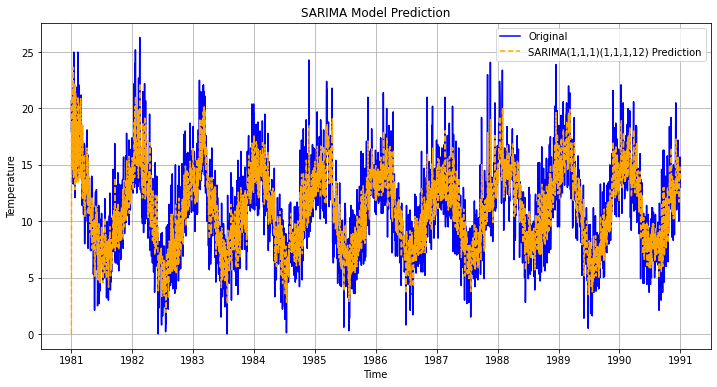

In [ ]:
# Plot original and SARIMA prediction
plt.figure(figsize=(12, 6))
plt.plot(data['Temp'], label='Original', color='blue')
plt.plot(data['SARIMA_Pred'], label='SARIMA(1,1,1)(1,1,1,12) Prediction', color='orange', linestyle='--')
plt.title('SARIMA Model Prediction')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()


## RESULT:

The python program to build and evaluate ARIMA and SARIMA models using different parameters is executed successfully.